In [78]:
import numpy as np
import glob
from astropy.io import fits
import matplotlib.pyplot as plt
from hcipy import *
plt.rcParams['figure.figsize'] = [12, 8]

In [2]:
import os
os.listdir()

['.ipynb_checkpoints',
 'snapshotdark_0_2020_3_12_19_45_70000us.fits',
 'snapshotdark_1_2020_3_12_19_45_70000us.fits',
 'snapshotdark_2_2020_3_12_19_45_70000us.fits',
 'snapshotdark_3_2020_3_12_19_45_70000us.fits',
 'snapshotdark_4_2020_3_12_19_45_70000us.fits',
 'snapshotdark_5_2020_3_12_19_45_70000us.fits',
 'snapshotdark_6_2020_3_12_19_45_70000us.fits',
 'snapshotdark_7_2020_3_12_19_45_70000us.fits',
 'snapshotdark_8_2020_3_12_19_45_70000us.fits',
 'snapshotdark_9_2020_3_12_19_45_70000us.fits',
 'snapshottest_0_2020_3_12_19_43_70000us.fits',
 'Untitled.ipynb']

In [6]:
dark_list = glob.glob('*dark*')

In [7]:
dark_list

['snapshotdark_0_2020_3_12_19_45_70000us.fits',
 'snapshotdark_1_2020_3_12_19_45_70000us.fits',
 'snapshotdark_2_2020_3_12_19_45_70000us.fits',
 'snapshotdark_3_2020_3_12_19_45_70000us.fits',
 'snapshotdark_4_2020_3_12_19_45_70000us.fits',
 'snapshotdark_5_2020_3_12_19_45_70000us.fits',
 'snapshotdark_6_2020_3_12_19_45_70000us.fits',
 'snapshotdark_7_2020_3_12_19_45_70000us.fits',
 'snapshotdark_8_2020_3_12_19_45_70000us.fits',
 'snapshotdark_9_2020_3_12_19_45_70000us.fits']

In [75]:
data = np.asarray(fits.getdata('snapshottest_0_2020_3_12_19_43_70000us.fits'), dtype = np.float64)
data += np.abs(data.min()) + 1
print(data.max())

65533.0


In [72]:
plt.imshow(np.log10(data), origin = 'lower')

(300, 335)

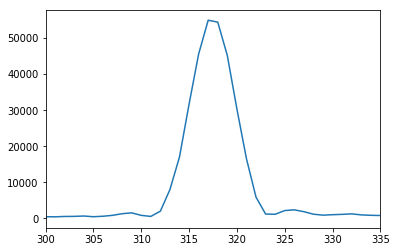

In [74]:
plt.plot(data[247,:])
plt.xlim(300,335)

In [10]:
dark_imgs = []
for i in range(len(dark_list)):
    darkd = fits.getdata(dark_list[i])
    dark_imgs.append(darkd)

In [38]:
dark = np.asarray(np.median(dark_imgs, axis=0), dtype = np.float64)

In [39]:
plt.imshow(dark,origin = 'lower')

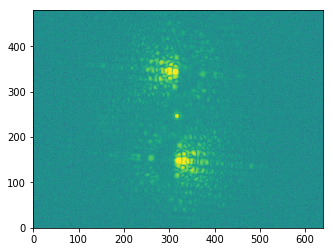

In [59]:
from matplotlib.colors import LogNorm
# data_reduced = data - dark
# data_reduced.min()
# data_reduced += np.abs(data_reduced.min())
# write_fits(data_reduced, 'reduced_data.fits')
plt.imshow(data_reduced, origin = 'lower', norm=LogNorm())

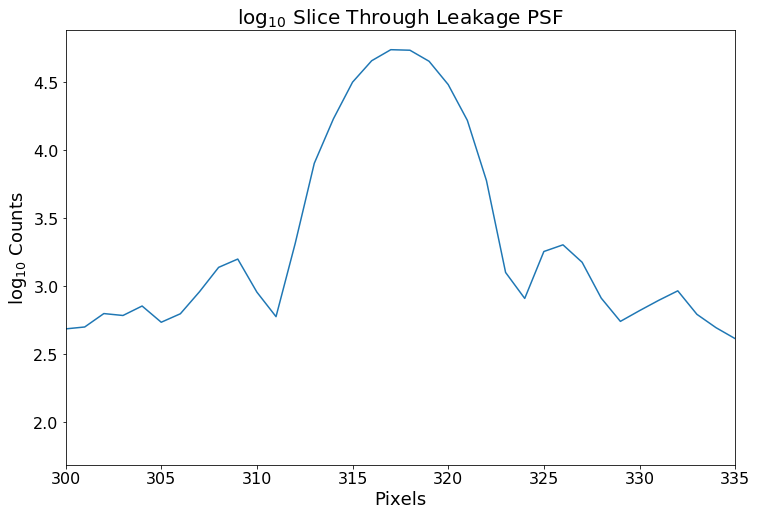

In [81]:
data_reduced.min()
plt.plot(np.log10(data_reduced[247,:]))
plt.xlim(300,335)
plt.xlabel('Pixels', fontsize = 18)
plt.ylabel('$\log_{10}$ Counts', fontsize = 18)
plt.tick_params(labelsize=16)
plt.title('$\log_{10}$ Slice Through Leakage PSF', fontsize = 20)
plt.savefig('core_slice.png')